In [166]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import h5py

In [167]:
DATA_PATH = "../data/SG24_dataset.h5"

In [168]:
data = h5py.File(DATA_PATH, 'r+') 

In [169]:
print(data.keys())

<KeysViewHDF5 ['Predictors', 'Target', 'User']>


In [170]:
print(data["Predictors"][()].shape)
print(data["Target"][()].shape)
print(data["User"][()].shape)

(29, 2400)
(1, 2400)
(1, 2400)


In [171]:
values, counts = np.unique(data["Target"][()], return_counts=True)
print(values)
print(counts)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
[100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100
 100 100 100 100 100 100]


In [184]:
for i in range(len(data["Predictors"][()][:,0])):
	print(data["Predictors"][()][:,0][i])

0.0
0.0
0.0
0.14544206109327615
0.0
-0.9893667706492572
0.0
77.0
67.0
74.0
94.0
165.0
82.0
68.0
79.0
138.0
72.0
97.0
106.0
132.0
77.0
91.0
96.0
0.0
83.0
33.0
136.0
140.0
143.0


In [185]:
# 3 translation position 
# 4 quaternions for the rotation of the hand 
# 22 angles to describe the shape of the hand

tmp = {}
for i in range(data["Predictors"][()].shape[0]):
	if i < 3:
		tmp["translation"+str(i)] = data["Predictors"][()][i,:]
	elif i < 7:
		tmp["quaternion"+str(i-3)] = data["Predictors"][()][i,:]
	else:
		tmp["angle"+str(i-7)] = data["Predictors"][()][i,:]

df = pd.DataFrame(data=tmp)
df["target"] = data["Target"][()].squeeze()
df["user"] = data["User"][()].squeeze()
	

In [186]:
df

,translation0,translation1,translation2,quaternion0,quaternion1,quaternion2,quaternion3,angle0,angle1,angle2,...,angle14,angle15,angle16,angle17,angle18,angle19,angle20,angle21,target,user
0,0.000000,0.000000,0.000000,0.145442,0.000000,-0.989367,0.000000,77.0,67.0,74.0,...,91.0,96.0,0.0,83.0,33.0,136.0,140.0,143.0,1,1
1,0.000000,0.000000,0.000000,0.195537,0.000000,-0.980696,0.000000,20.0,131.0,127.0,...,119.0,64.0,82.0,105.0,119.0,79.0,103.0,82.0,1,1
2,0.000000,0.000000,0.000000,0.294340,0.000000,-0.955701,0.000000,22.0,139.0,134.0,...,130.0,68.0,86.0,106.0,131.0,75.0,105.0,89.0,1,1
3,0.000000,0.000000,0.000000,0.352911,0.000000,-0.935657,0.000000,7.0,135.0,137.0,...,137.0,69.0,87.0,106.0,132.0,76.0,114.0,75.0,1,1
4,0.000000,0.000000,0.000000,0.318924,0.000000,-0.947780,0.000000,123.0,164.0,69.0,...,80.0,105.0,120.0,67.0,115.0,80.0,0.0,83.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2395,89.653893,-4.939997,59.903419,0.241562,-0.670560,0.240054,-0.659068,124.0,128.0,120.0,...,136.0,75.0,112.0,105.0,129.0,109.0,156.0,40.0,13,8
2396,81.091263,-8.493943,26.368565,0.729171,0.268913,0.486901,-0.398651,128.0,138.0,124.0,...,116.0,47.0,88.0,105.0,99.0,93.0,154.0,40.0,19,8
2397,79.688438,-11.858158,29.157537,0.675974,0.008543,0.631599,-0.379564,130.0,142.0,155.0,...,136.0,73.0,70.0,105.0,136.0,145.0,146.0,22.0,5,8
2398,79.544701,-12.103958,31.077909,0.598320,-0.014845,0.685385,-0.414777,122.0,124.0,115.0,...,114.0,109.0,199.0,105.0,137.0,205.0,138.0,24.0,24,8


In [187]:
df.describe()

,translation0,translation1,translation2,quaternion0,quaternion1,quaternion2,quaternion3,angle0,angle1,angle2,...,angle14,angle15,angle16,angle17,angle18,angle19,angle20,angle21,target,user
count,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,...,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000
mean,53.669293,-5.698329,0.203902,0.491011,-0.140472,0.164828,-0.149610,129.851667,137.503750,145.390833,...,103.005417,91.606667,143.834167,109.237083,120.668750,82.562500,137.099167,83.047500,12.500000,3.150000
std,41.520634,32.720964,22.393903,0.249192,0.281654,0.690302,0.268272,32.298842,15.895186,31.776834,...,45.260604,22.685341,53.253552,17.291823,29.802893,48.056139,21.926745,30.394479,6.923629,2.056517
min,0.000000,-81.559349,-68.739662,0.000000,-0.855817,-1.000000,-0.789427,1.000000,44.000000,36.000000,...,1.000000,25.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
25%,0.000000,-26.450032,-15.801244,0.314152,-0.387735,-0.846747,-0.360048,122.000000,128.000000,121.750000,...,79.000000,75.000000,92.000000,105.000000,104.000000,49.000000,131.000000,64.000000,6.750000,1.750000
50%,70.621365,0.000000,0.000000,0.555695,0.000000,0.471377,-0.062433,128.000000,135.000000,152.000000,...,114.000000,92.000000,159.000000,106.000000,126.000000,86.000000,141.000000,78.000000,12.500000,2.500000
75%,84.528341,0.000000,17.166466,0.691598,0.000000,0.629917,0.000000,134.000000,143.000000,170.000000,...,134.000000,111.000000,192.000000,107.000000,142.000000,116.000000,149.000000,101.000000,18.250000,4.250000
max,127.721718,78.185921,59.903419,0.955188,0.727471,1.000000,0.782390,238.000000,206.000000,207.000000,...,218.000000,229.000000,248.000000,255.000000,189.000000,216.000000,192.000000,193.000000,24.000000,8.000000


<AxesSubplot:xlabel='target', ylabel='Count'>

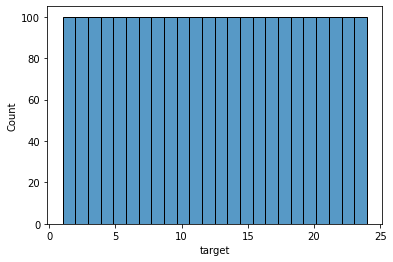

In [188]:
sns.histplot(df["target"], bins=24)

# the dataset is perfectly balanced which means we will be able to try many algorithm even
# some which are not robust, same for the type of evaluation score

<AxesSubplot:xlabel='user', ylabel='Count'>

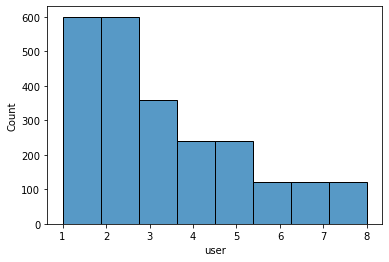

In [189]:
sns.histplot(df["user"], bins=8)

# when doing the train valid test split we will need to split by users to avoid overfitting
# the number of example per user is not balanced so need to think about it before splitting

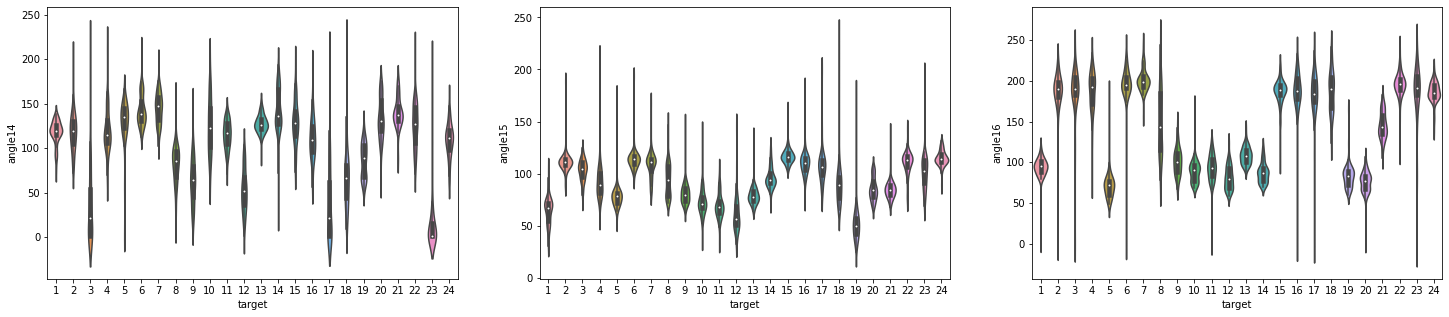

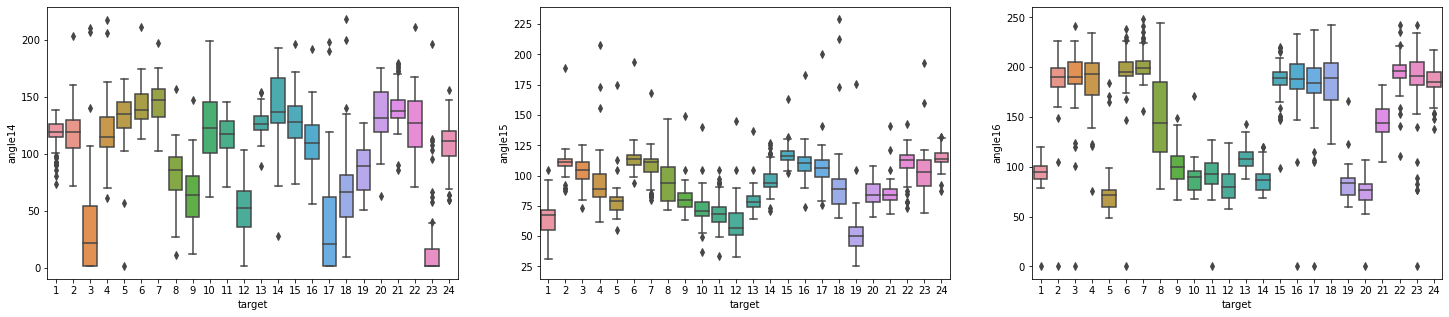

In [190]:
n_angle_test = 3

f, ax = plt.subplots(1, n_angle_test, figsize=(25,5))
ax_idx = 0
for i in range(7, 7+n_angle_test):
	sns.violinplot(y=df["angle"+str(i+7)], x=df["target"], ax=ax[ax_idx])
	ax_idx += 1

f, ax = plt.subplots(1, n_angle_test, figsize=(25,5))
ax_idx = 0
for i in range(7, 7+n_angle_test):
	sns.boxplot(data=df, y="angle"+str(i+7), x="target", ax=ax[ax_idx])
	ax_idx += 1

# all the angles have really different values according to the following plots

<AxesSubplot:>

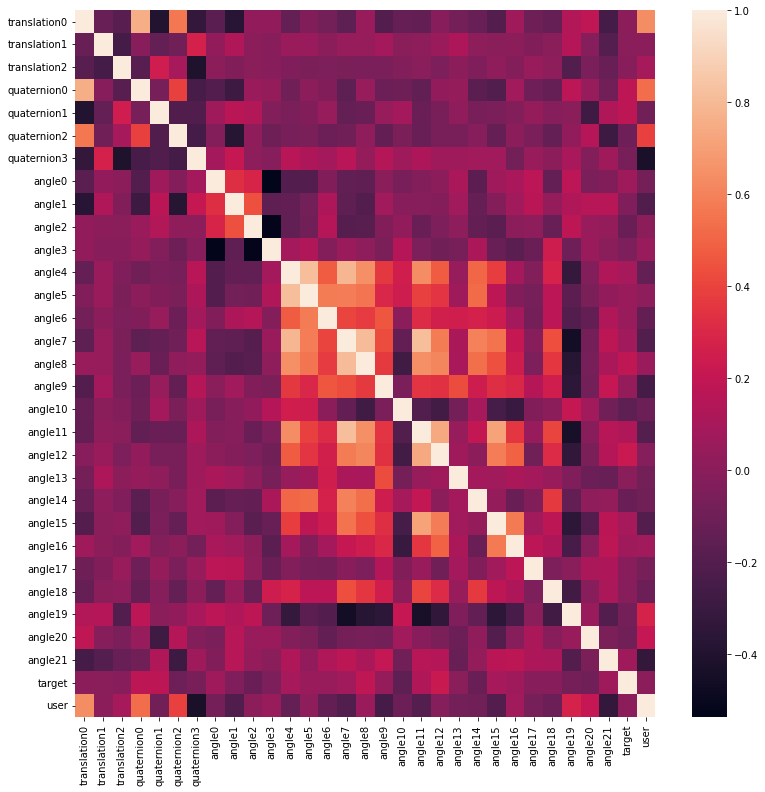

In [163]:
corr = df[[x for x in df.columns]].corr()
plt.figure(figsize=(13,13))
sns.heatmap(corr)

# 14 sensors on the fingers which might explain the big square in the correlation matrix
# it doesn't seem like some angles are much more important than others to classify the target